In [8]:
import numpy as np
import matplotlib.pyplot as plt
import obyn.training.train_tree as t
from obyn.evaluation.evaluate import evaluate
from obyn.evaluation.predict import predict
from obyn.evaluation.metrics import *
from obyn.evaluation.calculate_ths import calculate_ths
from obyn.utils.data_augmentation.artificial_labelling import create_artificial_labels
from obyn.utils import read_data
from obyn.utils import constants as C
from obyn.evaluation import metrics
from tqdm import tqdm
import importlib
importlib.reload(metrics)

<module 'obyn.evaluation.metrics' from 'C:\\Users\\kehua\\Documents\\Caltech\\CS 148\\obyn\\obyn\\evaluation\\metrics.py'>

In [9]:
data = read_data.LidarDataAugmented('augmented_8extra', force_reload=False)

In [3]:
data.x.shape

(2122, 1024, 3)

In [10]:
train_idx, valid_idx = data.load_indices('model8')

In [11]:
x_test = data.x[valid_idx]
y_test = data.y[valid_idx]

In [6]:
y_pred = predict('model8', X=x_test, use_outputs=False, confidence_threshold=0.46)

  0%|                                                                                                                                                                                   | 0/103 [00:00<?, ?it/s]

Model loaded in file: C:\Users\kehua\Documents\Caltech\CS 148\obyn\obyn\training\checkpoints\model8.ckpt
Getting model outputs...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [00:04<00:00, 22.28it/s]


In [13]:
f1_scores = []
for i in tqdm(range(x_test.shape[0])):
    TP, FP, FN = metrics.get_counts(y_test[i], y_pred[i], 0.5)
    f1_score = metrics.f1(TP, FP, FN)
    f1_scores.append(f1_score)

  0%|                                                                                                                                                                                   | 0/103 [00:00<?, ?it/s]


NameError: name 'y_pred' is not defined

In [45]:
num_trees = []
for i in range(y_test.shape[0]):
    num_trees.append(len(np.unique(y_test[i])))

In [12]:
%matplotlib inline

num_pts = data.num_points[valid_idx]
plt.scatter(f1_scores, np.log(data.num_points[valid_idx]), s=3)
plt.xlabel('Sample F1 Score')
plt.ylabel('Log # Points Originally in Sample')
plt.title('Test performance vs # Points Originally in Sample')
# plt.savefig('performance_vs_npoints.png')
plt.show()

NameError: name 'f1_scores' is not defined

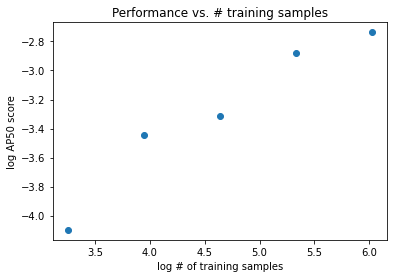

In [16]:
ap = [0.0166, 0.03188, 0.03644, 0.0562, 0.0648]
x = [1/16, 1/8, 1/4, 1/2, 1]
x = [i*414 for i in x]
plt.scatter(np.log(x), np.log(ap))
plt.xlabel('log # of training samples')
plt.ylabel('log AP50 score')
plt.title('Performance vs. # training samples')
plt.savefig('performance_vs_training.png')

In [48]:
np.argsort(f1_scores)[::-1]

array([  0, 100,   1,  56,  62,  47,  14,  44,  90,  40,   9,  18,  75,
       101,  52,  48,  96,  30,  33,  80,  78,  46,  19,  60,  79,  23,
        64,  27,  57,  24,  86,  87,  92,  39,  72,  58,  66,  35,  20,
        68,  55,   3,  34,  50,  53,  41,   8,  95,  65,  31,  45,  32,
        11,  36,  12,  97,  38,  76,  26,  82,  16,  88,  28,   2,  89,
        91,  43,  69,  21,  49,  71, 102,  98,  81,  99,  83,  74,  42,
        93,  25,   4,  17,  67,  29,  77,  70,  63,  22,  61,  10,  13,
        37,  51,  54,  94,   7,  85,  84,   6,   5,  73,  59,  15],
      dtype=int64)

In [46]:
np.argsort(num_trees)

array([  0,  14,  56,  47,  90,  44,  24,  23,  40,  33, 100,   1,  78,
        50,  48,  34,  46,  19,  52,  62,  75,  96,  79,  80, 101,  30,
        32,  60,  69,  39,  87,  86,   9,  18,   3,  26,  16,  64,  82,
        55,  27,  68,  21,  63,  11,  58,  72,  93,  28,  29,   8,  31,
        65,  98,  41,  42,  92,  95,  37,  12,  53,  57,   4,  76,  45,
        66,  70,  89,  59,  61,  43,  22,  38,  36,  20,  88,  91,  10,
        97,  71,  74,  13,  54,  94,  51,  35,  15,   7,  85,  83,  81,
        84,  99,  49,   2,   6,  17,   5,  73,  67, 102,  77,  25],
      dtype=int64)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

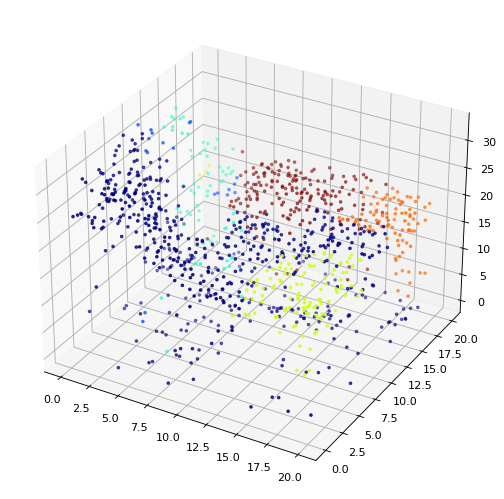

In [90]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)

i = 15
points = x_test[i]

color = y_pred[i]
true_c = y_test[i]
ax = plt.axes(projection='3d')

ax.scatter(points[:,0], points[:,1], points[:,2], c=color, s=5, cmap='jet')

plt.show()

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)

i = 112
points = data.x[i]

true_c = data.y[i]
ax = plt.axes(projection='3d')

ax.scatter(points[:,0], points[:,1], points[:,2], c=true_c, s=5, cmap='jet')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [62]:
from obyn.utils.data_augmentation.artificial_labelling import create_artificial_labels


In [63]:
y_kmeans = create_artificial_labels(x_test, y_test)

  1%|█▋                                                                                                                                                                         | 1/103 [00:00<00:10,  9.52it/s]

Creating artificial labels...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [00:15<00:00,  6.76it/s]


In [70]:
figure(figsize=(12, 8), dpi=80)

points = x_test[i]

color = y_kmeans[i]
ax = plt.axes(projection='3d')

ax.scatter(points[:,0], points[:,1], points[:,2], c=color, s=5, cmap='jet')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …